In [106]:
# Gerekli kütüphaneleri ekleyelim:
import numpy as np    
import pandas as pd  
import os             
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

Gerekli kütüphaneler eklendi.

In [107]:
# Veri setini okumak için:
df_ = pd.read_csv(filepath_or_buffer="/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")
df = df_.copy()


Veri seti eklendi.

In [108]:
import random 

# Veri setine rastgele eksik veri eklemek için:

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    
    df_missing = dataframe.copy()
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    if seed:
        random.seed(seed)

    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

Her bir kolonun %5'i eksik veri haline getirildi.

In [109]:
# veri setinin ik 3 gözlemi:
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",NaN,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0


Veri setindeki ilk 3 kolona bakış.

In [110]:
# sondan 3 gözlemi görmek için:
df.tail(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
4800,0.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617.0,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0.0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6.0
4801,0.0,[],http://shanghaicalling.com/,126186.0,[],en,NaN,When ambitious New York attorney Sam is sent t...,0.857008,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0.0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7.0
4802,0.0,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,25975.0,"[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...",en,My Date with Drew,Ever since the second grade when he first saw ...,1.929883,"[{""name"": ""rusty bear entertainment"", ""id"": 87...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-08-05,0.0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,My Date with Drew,6.3,16.0


Veri setindeki son 3 kolona bakış.

In [111]:
# Veri setindeki satır ve sütun sayılarını görmek için:
df.shape # -> (satır, sütun)

(4803, 20)

Veri setinde toplam 4803 adet satır, 20 adet sütun bulunmaktadır.

In [112]:
# Veri setindeki kolonları liste halinde yazdırır:
print(list(df.columns), '\n')

['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'vote_average', 'vote_count'] 



In [113]:
# Toplam kolon sayısını görmek için:
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

Veri seti içerisinde toplam 20 kolon vardır.



In [114]:
# Kolonların veri tipini görnek için:
print(f"df.columns'un döndürdüğü veri tipi: {type(df.columns)}\n")

df.columns'un döndürdüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [115]:
# Veri setine ait yapısal bilgilere ulaşmak için:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4669 non-null   float64
 1   genres                4664 non-null   object 
 2   homepage              1660 non-null   object 
 3   id                    4661 non-null   float64
 4   keywords              4661 non-null   object 
 5   original_language     4664 non-null   object 
 6   original_title        4677 non-null   object 
 7   overview              4635 non-null   object 
 8   popularity            4658 non-null   float64
 9   production_companies  4666 non-null   object 
 10  production_countries  4662 non-null   object 
 11  release_date          4663 non-null   object 
 12  revenue               4662 non-null   float64
 13  runtime               4672 non-null   float64
 14  spoken_languages      4651 non-null   object 
 15  status               

Veri setinde budget, genres, homepage, id, keywords, original_language, original_title, overview, popularity, production_companies, production_countries, release_date, reveue, runtime, spoken_languages, status, tagline, title, vote_average, vote_count olmak üzere 20 adet kolon bulunmaktadır. 
Bu kolonlardan; budget kolonunun 4669 adet, genres kolonunun 4664 adet, homepage kolonunun 1660 adet, id kolonunun 4661 adet, keyword kolonunun 4661 adet, original_language kolonunun 4664 adet, original_title kolonunun 4677 adet, overview kolonunun 4635 adet, popularity kolonunun 4658 adet, production_companies kolonunun 4666 adet, production_countries kolonunun 4662 adet, release_date kolonunun 4663 adet, revenue kolonunun 4662 adet, runtime kolonunun 4672 adet, spoken_languages kolonunun 4651 adet, status kolonunun 4648 adet, tagline kolonunun 3858 adet, title kolonunun 4661 adet, vote_average kolonunun 4641 adet, vote_count kolonunun 4673 adet non-null verisi bulunmaktadır.

In [116]:
# Sadece değişkenleri görmek ve tiplerini görüntülemek için:
df.dtypes

budget                  float64
genres                   object
homepage                 object
id                      float64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count              float64
dtype: object

7'si float64, 13'ü object veri tipi olmak üzere toplam 20 kolon bulunmaktadır.

In [117]:
# Kategorik ve numerik değişkenlerin isimlerini farklı listelerde tutmak için yeni liste oluşturma:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

Üzerinde çalışmayı daha basit hale getirmek için veriyi kategorik ve nümerik olmak üzere birbirinden ayırıyoruz.

In [118]:
# Oluşturulan listeleri görüntüleme:
print(f"categorical_features: {(categorical_features)}\n")
print(f"numerical_features: {(numerical_features)}\n")

categorical_features: ['genres', 'homepage', 'keywords', 'original_language', 'original_title', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title']

numerical_features: ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']



kategorik verileri içeren liste -> genre, homepage, keywords, original_language, original_title, overview, production_companies, production_countries, release_date, spoken_languages, status, tagline, title.
Toplam 13 adet kategorik veri içeren kolon bulunmaktadır.

nümerik verileri içeren liste -> budget, id, popularity, revenue, runtime, vote_average,vote_count.
Toplam 7 adet float64 nümerik veri içeren kolon bulunmaktadır.

In [119]:
# describe() -> Veri setindeki nümerik değerlerin istatiksel bir özetini sunar.
df.describe() 

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.669000e+03,4661.000000,4658.000000,4.662000e+03,4672.000000,4641.000000,4673.000000
mean,2.915251e+07,57714.630766,21.537954,8.267923e+07,106.806079,6.092954,693.478493
std,4.086551e+07,89226.126470,31.980637,1.640564e+08,22.508308,1.193214,1242.232075
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9029.000000,4.680875,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14758.000000,13.033455,1.926359e+07,103.000000,6.200000,238.000000
75%,4.000000e+07,59859.000000,28.465143,9.318275e+07,117.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


Budget:
Ortalama: 29.15 milyon
Minimum: 0 (veri eksik veya bütçesi olmayan filmler)
Maksimum: 380 milyon
Çoğu filmin bütçesi 15 milyon (medyan) civarında.

id:
Benzersiz film kimlikleri, minimum 5 ve maksimum 459,488 arasında değişiyor.

popularity:
Ortalama popülerlik: 21.54
Maksimum: 875.58 (çok popüler filmler).
Çoğu film 13 civarında popülerlik skoruna sahip.

Revenue:
Ortalama: 82.67 milyon
Maksimum: 2.78 milyar
Medyan: 19.26 milyon (çoğu film orta düzeyde gelir elde etmiş).

Runtime:
Ortalama: 106.8 dakika
Minimum: 0 (veri eksik veya kısa filmler)
Maksimum: 338 dakika (çok uzun filmler).

Vote Average (Ortalama Oy):
Ortalama: 6.09
Maksimum: 10 (tam puan alan filmler).
Çoğu film 6 civarında oy almış.

Vote Count:
Ortalama: 693 oy
Maksimum: 13,752 oy (çok fazla oy alan filmler).
Çoğu film 238 oy almış.

In [120]:
# Eksik Veri Analizi 
# isna() metodu veri setindeki eksik verilerin olup olmadığını bool ile geri döndürür.
# sum() toplamı döndürür.
df.isna().sum()

budget                   134
genres                   139
homepage                3143
id                       142
keywords                 142
original_language        139
original_title           126
overview                 168
popularity               145
production_companies     137
production_countries     141
release_date             140
revenue                  141
runtime                  131
spoken_languages         152
status                   155
tagline                  945
title                    142
vote_average             162
vote_count               130
dtype: int64

budget kolonunda 134 adet, genres kolonunda 139 adet, homepage kolonunda 3143 adet, id kolonunda 142 adet, keywords kolonunda 142 adeti original_language kolonunda 139 adet, original_title kolonunda 126 adet, overview kolonunda 168 adet, popularity kolonunda 145 adet, production_companies kolonunda 137 adet, production_countries kolonunda 141 adet, release_date kolonunda 140 adet, revenue kolonunda 141 adet, runtime kolonunda 131  adet, spoken_languages kolonunda 152 adet, status kolonunda 155 adet, tagline kolonunda 945 adet, title kolonunda 142 adet, vote_average kolonunda 162 adet, vote_count kolonunda 130 adet eksik veri bulunmaktadır.

In [121]:
df.isna().sum().sum()

6654

Veri setindeki toplam eksik kayıt sayısı 6654'tür.

In [122]:
# Veri setinde en az 1 gözlemi eksik olan kayıtlar:
df[df.isnull().any(axis = 1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",NaN,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026.0,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,NaN,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106.0
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529.0,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,NaN
5,258000000.0,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559.0,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",NaN,2007-05-01,8.908716e+08,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367.0,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2.040920e+06,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238.0
4799,9000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766.0,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,NaN,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5.0
4800,0.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617.0,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States

Herhangi bir verisi eksik olan satır sayısı 3987'dir.

In [123]:
# Hiç eksik gözlemi olmayan kayıtlar:
df[df.notnull().all(axis = 1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
6,260000000.0,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757.0,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,5.917949e+08,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330.0
7,280000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861.0,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1.405404e+09,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767.0
8,250000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://harrypotter.warnerbros.com/harrypottera...,767.0,"[{""id"": 616, ""name"": ""witch""}, {""id"": 2343, ""n...",en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{""name"": ""Warner Bros."", ""id"": 6194}, {""name""...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,9.339592e+08,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Dark Secrets Revealed,Harry Potter and the Half-Blood Prince,7.4,5293.0
11,200000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.mgm.com/view/movie/234/Quantum-of-S...,10764.0,"[{""id"": 627, ""name"": ""killing""}, {""id"": 1568, ...",en,Quantum of Solace,Quantum of Solace continues the adventures of ...,107.928811,"[{""name"": ""Eon Productions"", ""id"": 7576}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2008-10-30,5.860907e+08,106.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,"For love, for hate, for justice, for revenge.",Quantum of Solace,6.1,2965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4765,0.0,"[{""id"": 27, ""name"": ""Horror""}]",https://www.facebook.com/pages/Raymond-Did-It/...,228550.0,"[{""id"": 6270, ""name"": ""high school""}, {""id"": 9...",en,Raymond Did It,Mentally challenged Raymond Rourke gets blamed...,0.160779,[],[],2011-03-27,0.000000e+00,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mom's Pretty Mad At Me,Raymond Did It,3.2,8.0
4766,0.0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 104...",http://www.mgm.com/#/our-titles/1092/The-Last-...,13963.0,"[{""id"": 1228, ""name"": ""1970s""}, {""id"": 6027, ""...",en,The Last Waltz,Martin Scorsese's rockumentary intertwines foo...,3.277287,"[{""name"": ""FM Productions"", ""id"": 12601}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1978-05-01,3.219520e+05,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It Started as a Concert. It Became a Celebration.,The Last Waltz,7.9,64.0
4772,31192.0,"[{""id"": 18, ""name"": ""Dra

Hiçbir verisi eksik olmayan satır sayısı 816 adet.

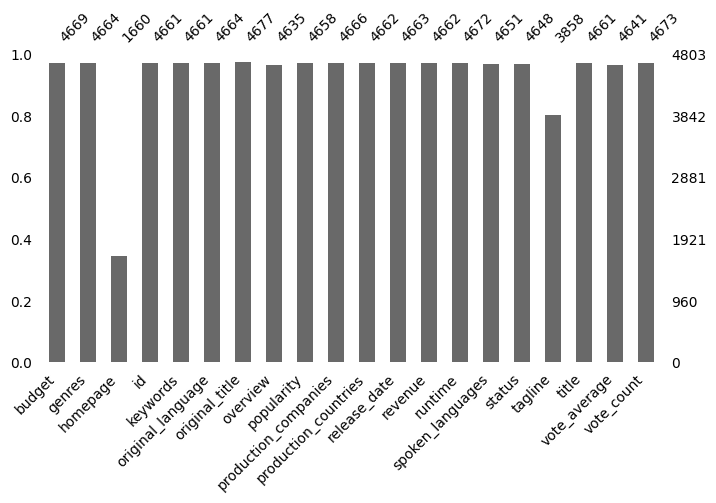

In [124]:
import missingno as msno

msno.bar(df = df, 
        figsize = (8, 4),
        fontsize = 10);

En üstte her bir gözlemin eksik olmayan kayıt sayısı gösterilmektedir, en sağ üstte toplam kayıt sayısı gösterilmektedir. homepage ve tagline sütunlarının eksik veri sayısı sırasıyla 1921 ve 3842 olarak görülmektedir.

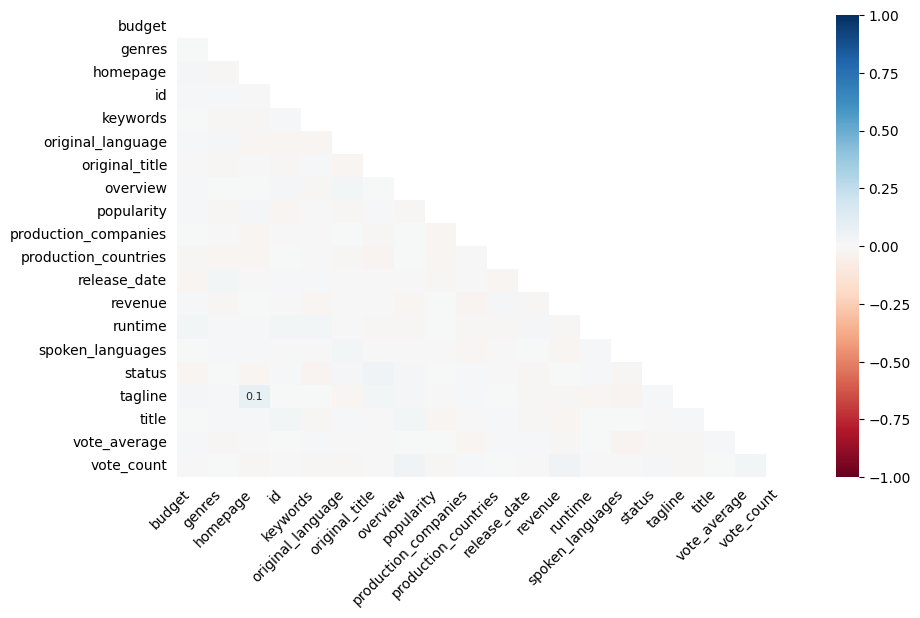

In [125]:
# İlişki durumunu ısı haritası şeklinde gösterme:
msno.heatmap(df = df,
            figsize = (10, 6),
            fontsize = 10);

In [126]:
# Eksik veri sayısı
total_missing = df.isna().sum().sum()

# Toplam hücre sayısı
total_cells = df.size

# Eksik veri oranı
missing_percentage = (total_missing / total_cells) * 100

print(f"Veri setinin %{missing_percentage:.2f}'i eksik veri içeriyor.")


Veri setinin %6.93'i eksik veri içeriyor.


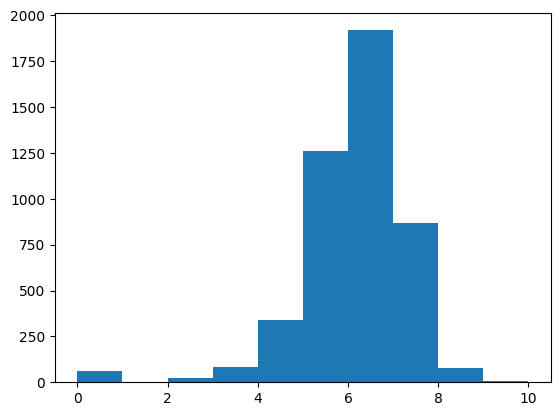

In [127]:
plt.hist(df['vote_average'])
plt.show()

# Örnek olarak nümerik verilerden birisi olan vote_average'ın dağılımı

Örnek olarak vote_average nümerik verisinin dağılımını görmek için onu bir histogramda gösterdik, sağa doğru kuyruklu çıktı. Kuyruklu çıktığı için medyan ile doldurmak daha sağlıklı olacağından medyan ile doldurma seçilmiştir.

134


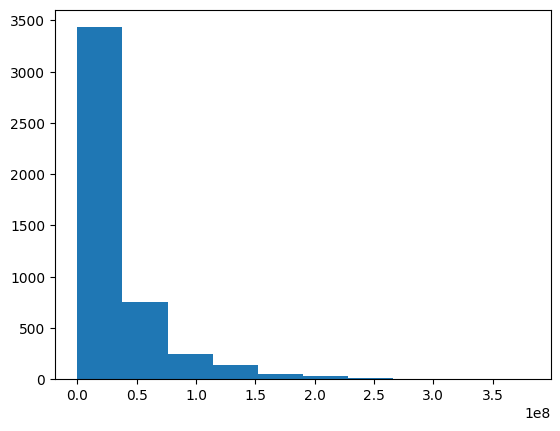

In [128]:
df['budget'].isna().sum()
print(f"{(df['budget'].isna().sum())}") 

plt.hist(df['budget'])
plt.show()

Budget kolonunda toplam eksik veri sayısı -> 134
Medyan, veri dağılımındaki aşırı uç değerlerden etkilenmez ve genellikle sağa çarpık (skewed right) dağılımlar için daha uygundur. Bu yüzden eksik verileri doldururken medyanı kullanıyorum.

In [129]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995.0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800.0
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,285.0,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500.0
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647.0,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",NaN,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466.0


In [130]:
df_fillna.isna().sum()
# kopya verilerin içindeki NaN değer sayısı:

budget                   134
genres                   139
homepage                3143
id                       142
keywords                 142
original_language        139
original_title           126
overview                 168
popularity               145
production_companies     137
production_countries     141
release_date             140
revenue                  141
runtime                  131
spoken_languages         152
status                   155
tagline                  945
title                    142
vote_average             162
vote_count               130
dtype: int64

In [131]:
mean_budget = df_fillna['budget'].median()

df_fillna['budget'] = df_fillna['budget'].fillna(value = mean_budget)

df_fillna['budget'].isna().sum()
print(f"{(df_fillna['budget'].isna().sum())}") 


0


Medyanla doldurulan eksik verileri tekrar kontrol etmek için yukarıdaki kodu çalıştırdım ve eksik verilerin artık olmadığını gördüm. Diğer nümerik veriler de aynı şekilde hesaplanıp medyanla doldurulabilir. Aynı işlemi tekrar edip dosyamı uzatmamak adına nümerik eksik verileri doldurmayı sadece bu örnekle sınırlı tutuyorum. Şimdi kategorik verilere bakalım.

In [132]:
# genres değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['genres'].isna().sum()
print(f"{(df_fillna['genres'].isna().sum())}")

# genres değişkeninde en çok tekrar eden değeri(mode) alalım.
genres_mode = df_fillna['genres'].mode()

# genres değişkenini mode değeri ile dolduralım.
df_fillna['genres'] = df_fillna['genres'].fillna(value = genres_mode[0])

# genres değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

139


budget                     0
genres                     0
homepage                3143
id                       142
keywords                 142
original_language        139
original_title           126
overview                 168
popularity               145
production_companies     137
production_countries     141
release_date             140
revenue                  141
runtime                  131
spoken_languages         152
status                   155
tagline                  945
title                    142
vote_average             162
vote_count               130
dtype: int64

Kategorik eksik verileri doldurmanın en güvenli yolu mod ile doldurmak olduğu için burada mod ile doldurmayı tercih ettim. Başlangıçta 139 adet eksik veriye sahip olan genres kolonunda son halinde eksik veri bulunmuyor.

In [133]:
# Spesifik bir veri tipi tutan değişkenleri seçmek için select_dtypes() kullanıyorum:
df_categorical = df.select_dtypes(include = "object")

print(df_categorical.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   genres                4664 non-null   object
 1   homepage              1660 non-null   object
 2   keywords              4661 non-null   object
 3   original_language     4664 non-null   object
 4   original_title        4677 non-null   object
 5   overview              4635 non-null   object
 6   production_companies  4666 non-null   object
 7   production_countries  4662 non-null   object
 8   release_date          4663 non-null   object
 9   spoken_languages      4651 non-null   object
 10  status                4648 non-null   object
 11  tagline               3858 non-null   object
 12  title                 4661 non-null   object
dtypes: object(13)
memory usage: 487.9+ KB
None


In [134]:
# Örneğin original_language kolonumdaki benzersiz verileri seçmek için:
df_categorical["original_language"].unique()

array(['en', nan, 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te',
       'cn', 'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt',
       'is', 'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro',
       'fa', 'no', 'sl', 'ps', 'el'], dtype=object)

In [135]:
# her bir kolonda kaç adet benzersiz değer olduğunu bulmak için:
for col in df_categorical.columns:
    print(f'{df_categorical[col].nunique()} adet "{col}" değerinden bulunmaktadır.\n')

1148 adet "genres" değerinden bulunmaktadır.

1640 adet "homepage" değerinden bulunmaktadır.

4097 adet "keywords" değerinden bulunmaktadır.

37 adet "original_language" değerinden bulunmaktadır.

4675 adet "original_title" değerinden bulunmaktadır.

4635 adet "overview" değerinden bulunmaktadır.

3587 adet "production_companies" değerinden bulunmaktadır.

457 adet "production_countries" değerinden bulunmaktadır.

3213 adet "release_date" değerinden bulunmaktadır.

529 adet "spoken_languages" değerinden bulunmaktadır.

3 adet "status" değerinden bulunmaktadır.

3843 adet "tagline" değerinden bulunmaktadır.

4658 adet "title" değerinden bulunmaktadır.



In [136]:
# her bir kolondaki kategorideki veri sayısını almak için:
for col in df_categorical.columns:
    print(f'{df_categorical[col].value_counts()}\n', 5*"*********")

genres
[{"id": 18, "name": "Drama"}]                                                                                                                                             362
[{"id": 35, "name": "Comedy"}]                                                                                                                                            274
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                           160
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                          142
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                               137
                                                                                                                           

Örnek olarak Drama alanında 362 adet, Comedy alanında 274 adet, hem Drama hem Romance alanında toplam 160, hem Comedy hem Romance alanında 142, hem Comedy hem de Drama alanında ise toplam 137 adet kayıt bulunmakta.

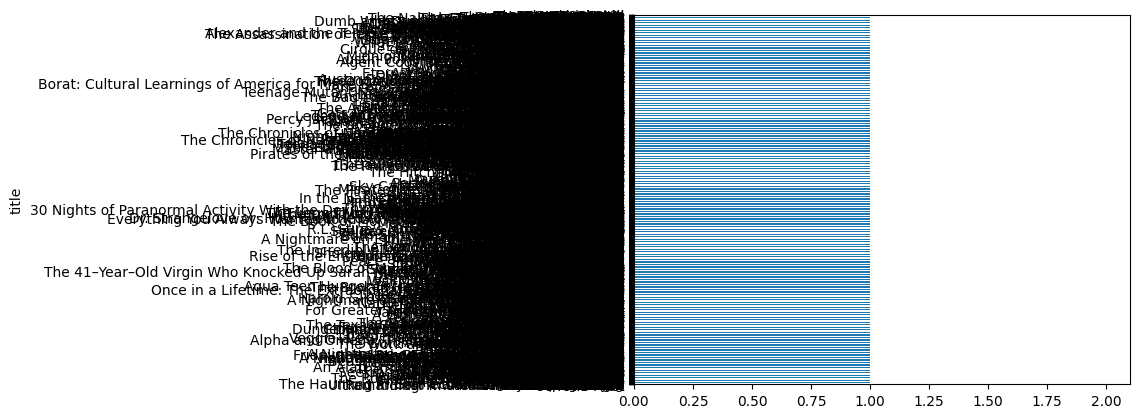

In [137]:
from pandas.api.types import CategoricalDtype

df['title'].value_counts().plot.barh();


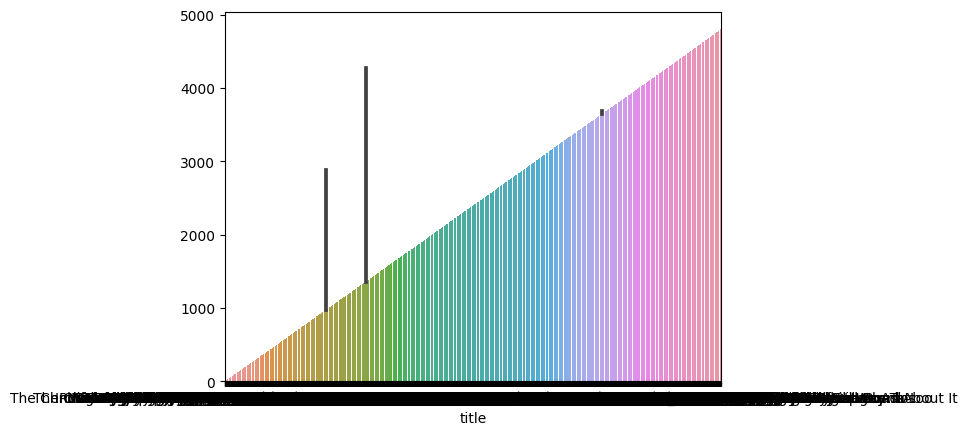

In [138]:
sns.barplot(data = df, x = "title", y = df.title.index);


In [139]:
df_budget = df['budget']
print(f"{(df_budget)}")

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
4       260000000.0
           ...     
4798       220000.0
4799         9000.0
4800            0.0
4801            0.0
4802            0.0
Name: budget, Length: 4803, dtype: float64


In [140]:
# Quantile değerlerin belirlenmesi.
Q1 = df_budget.quantile(0.25)
Q3 = df_budget.quantile(0.75)

print(Q1)
print(Q3)

# IQR değerin belirlenmesi.
IQR = Q3-Q1
print(IQR)

# Alt ve üst sınırların belirlenmesi.
lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

outlier_idx = df_budget[df_budget > upper_fence].index

outlier_idx

800000.0
40000000.0
39200000.0


Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
        378,  385,  468,  491,  498,  565,  566,  692, 1062, 1652],
      dtype='int64', length=316)

316 tane değer outlier değer, yani maksimum değerin üstünde kalan değerler; aykırı değerler.

In [141]:
# aykırı değerlerin silinmiş hali:
df_del = df[~(df_budget > upper_fence)]

df_del

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
28,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397.0,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-06-09,1.513529e+09,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662.0
44,NaN,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259.0,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",2015-04-01,1.506249e+09,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176.0
83,27000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698.0,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0.000000e+00,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,The Lovers,4.8,34.0
86,NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 12, ""nam...",http://www.shrekforeverafter.com/,NaN,"[{""id"": 189111, ""name"": ""ogre""}, {""id"": 209714...",en,Shrek Forever After,A bored and domesticated Shrek pacts with deal...,44.041186,"[{""name"": ""DreamWorks Animation"", ""id"": 521}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-05-16,7.526009e+08,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It ain't Ogre... Til it's Ogre,Shrek Forever After,6.0,1959.0
97,15000000.0,NaN,NaN,315011.0,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,7.700000e+07,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367.0,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2.040920e+06,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238.0
4799,9000.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766.0,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,NaN,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5.0
4800,0.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617.0,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0.000000e+00,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6.0
4801,0.0,[],http://shanghaicalling.com/,126186.0,[],en,NaN,When ambitious New York attorney Sam is s